In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Price')

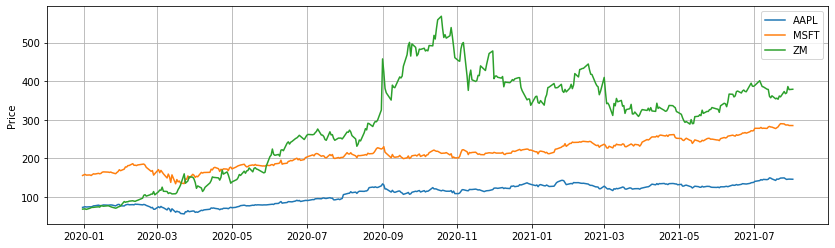

In [2]:
tickers = ["AAPL", "MSFT", "ZM"]
fig, ax = plt.subplots(figsize=(14, 4))
for ticker in tickers:
    historical_data = yf.download(ticker, start="2020-01-01", interval='1d', auto_adjust=True)
    price = historical_data["Close"]
    ax.plot(price, label=ticker)
    
ax.legend()
ax.grid()
ax.set_ylabel("Price")

In [3]:
import mplfinance as mpf

[*********************100%***********************]  1 of 1 completed


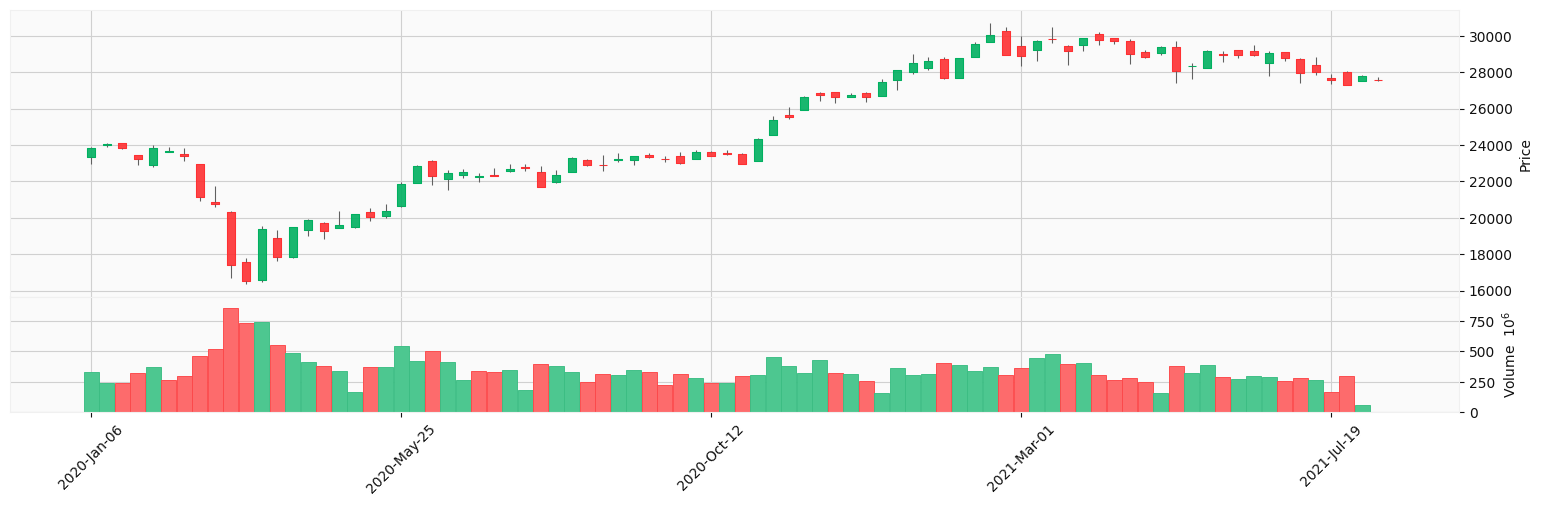

In [4]:
ticker = "^N225"
historical_data = yf.download(ticker, start="2020-01-01", interval="1wk", auto_adjust=True)
mpf.plot(historical_data, type='candle', style='yahoo', figratio=(14, 4), volume=True)

[*********************100%***********************]  1 of 1 completed


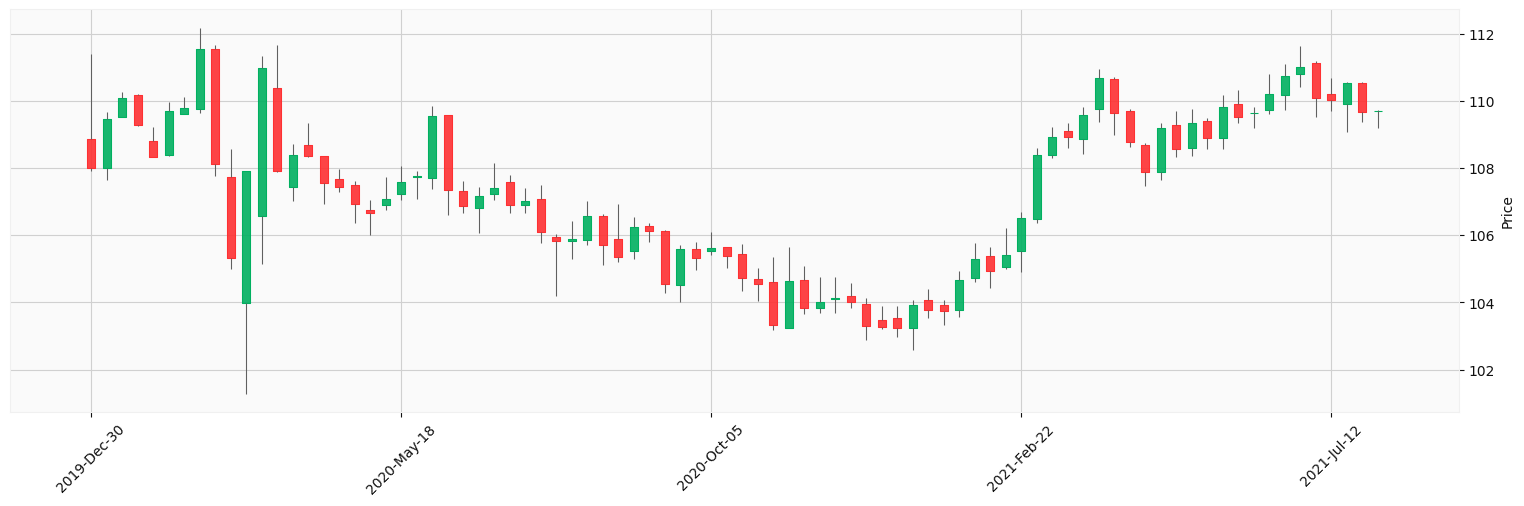

In [5]:
ticker = "USDJPY=X"
historical_data = yf.download(ticker, start="2020-01-01", interval="1wk", auto_adjust=True)[:-1]
mpf.plot(historical_data, type='candle', style='yahoo', figratio=(14, 4), volume=False)

[*********************100%***********************]  1 of 1 completed


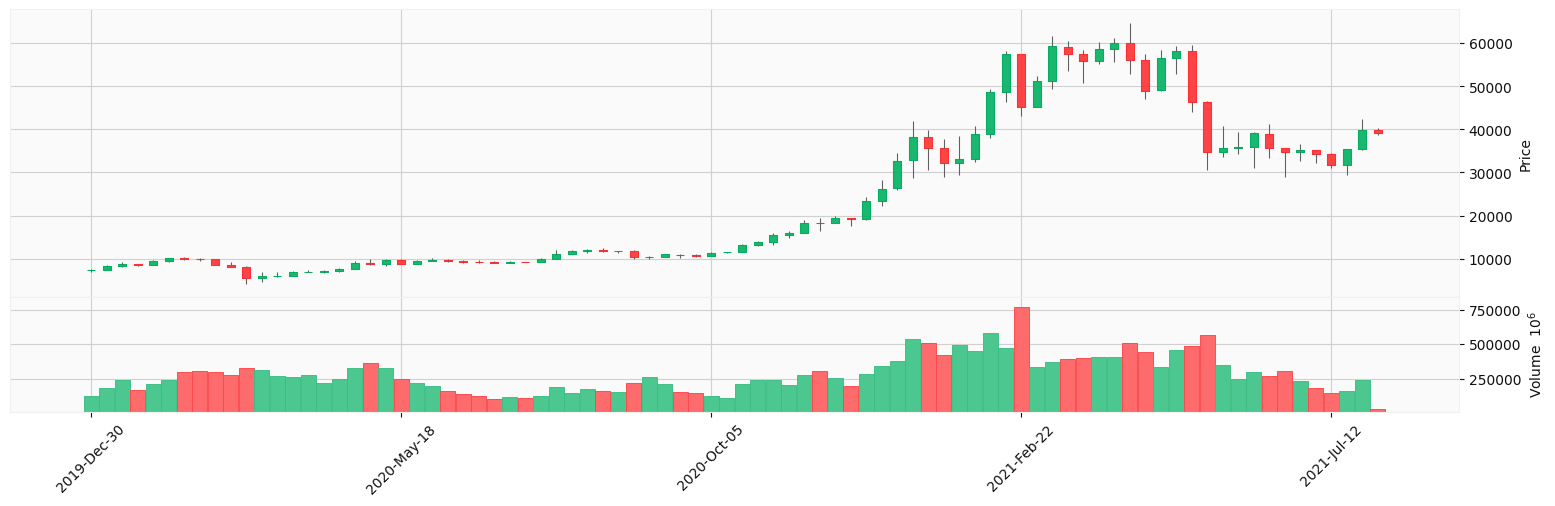

In [6]:
ticker = "BTC-USD"
historical_data = yf.download(ticker, start="2020-01-01", interval="1wk", auto_adjust=True)[:-1]
mpf.plot(historical_data, type='candle', style='yahoo', figratio=(14, 4), volume=True)

データ分析
- 投資のリターン（収益率）
- 投資のリスク（収益率の分散）
- 投資の効率性（シャープレシオ）
- 収益率の分布

In [23]:
tickers = ["AAPL", "MSFT", "ZM", "^N225", "^DJI", "^GSPC", "BTC-USD", "ETH-USD"]
stats = pd.DataFrame(columns=["Mean [%]", "Std [%]", "Sharp Ratio"], index=tickers)
for ticker in tickers:
    historical_data = yf.download(ticker, start="2020-01-01", interval="1d", auto_adjust=True)
    price = historical_data["Close"]
    returns = price.pct_change(1)
    sharp_ratio = returns.mean() / returns.std()
    stats.loc[ticker, :] = [returns.mean() * 100, returns.std() * 100, sharp_ratio]

stats

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Mean [%],Std [%],Sharp Ratio
AAPL,0.207116,2.55322,0.0811194
MSFT,0.179525,2.34317,0.0766161
ZM,0.537642,4.71297,0.114077
^N225,0.0566135,1.48951,0.038008
^DJI,0.0681921,1.90091,0.0358734
^GSPC,0.092987,1.79839,0.0517056
BTC-USD,0.38077,4.13546,0.0920743
ETH-USD,0.673743,5.52795,0.121879


<AxesSubplot:xlabel='Std [%]', ylabel='Mean [%]'>

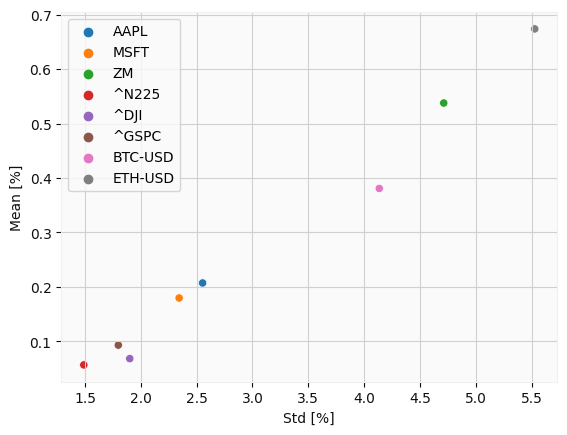

In [24]:
sns.scatterplot(data=stats, x='Std [%]', y='Mean [%]', hue=stats.index)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Price', ylabel='Count'>

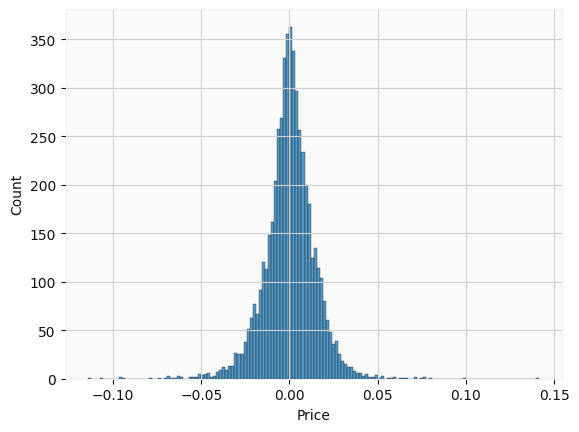

In [26]:
ticker = "^N225"
historical_data = yf.download(ticker, start="2000-01-01", interval="1d", auto_adjust=True)
price = historical_data["Close"].rename("Price")
returns = price.pct_change(1)
sns.histplot(data=returns)

In [19]:
ticker = "MSFT"  # Microsoft
df = pd.DataFrame()
historical_data = yf.download(ticker, start="2020-01-01", interval="1d", auto_adjust=True)
price = historical_data["Close"].rename("Price")
returns = price.pct_change(1).rename("Return [%]") * 100
df = pd.concat([price, returns], axis=1)
return_mean = df["Return [%]"].mean()
return_std = df["Return [%]"].std()
sharp_ratio = return_mean / return_std
print(return_mean, return_std, sharp_ratio)
print()
df

[*********************100%***********************]  1 of 1 completed
0.17952460488613667 2.3431709422891407 0.07661609387779095



,Price,Return [%]
Date,,
2019-12-31,155.329636,NaN
2020-01-02,158.205765,1.851629
2020-01-03,156.235825,-1.245176
2020-01-06,156.639694,0.258500
2020-01-07,155.211456,-0.911798
...,...,...
2021-07-27,286.540009,-0.868355
2021-07-28,286.220001,-0.111680
2021-07-29,286.500000,0.097826
